<a href = "https://colab.research.google.com/github/flyingzaptop/pythoncolab/bl ob/main/%d0%9f%d1%80%d0%d0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0%20Tree.ipynb" <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "otwórz w colab"/> </a>

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [146]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [147]:
df = df[['pclass', 'age', 'embarked', 'fare']]
df.head()

,pclass,age,embarked,fare
0,3,22.0,S,7.2500
1,1,38.0,C,71.2833
2,3,26.0,S,7.9250
3,1,35.0,S,53.1000
4,3,35.0,S,8.0500


# Zadanie 1
Czyste dane z emisji (tylko „taryfy”), podziel się na szkolenia i czaty testowe

<Axes: >

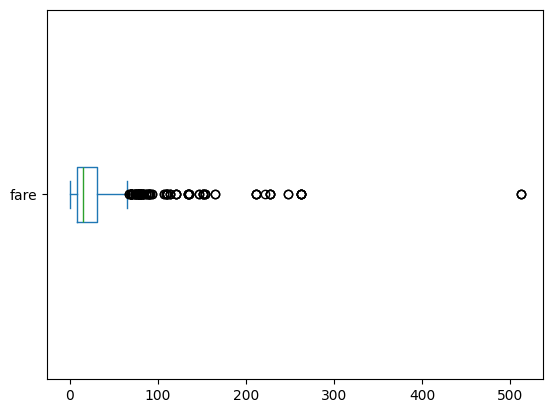

In [148]:
df['fare'].plot.box(vert = False)

In [149]:
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df = df[(df['fare'] > lower) & (df['fare'] < upper)]

<Axes: >

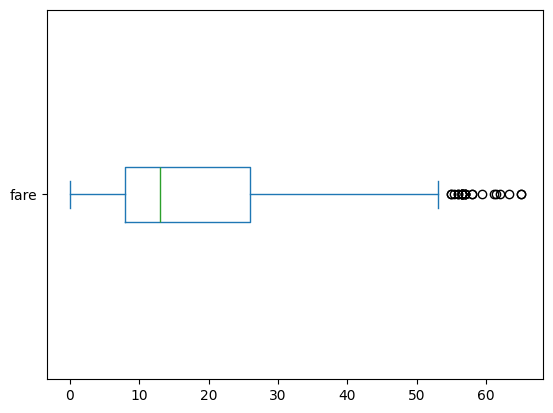

In [151]:
df['fare'].plot.box(vert = False)

In [172]:
df.dropna(inplace=True)

In [173]:
from types import SimpleNamespace
y = df['fare']
X = df.drop('fare', axis=1)
X

,pclass,age,embarked
0,3,22.0,S
2,3,26.0,S
3,1,35.0,S
4,3,35.0,S
6,1,54.0,S
...,...,...,...
885,3,39.0,Q
886,2,27.0,S
887,1,19.0,S
889,1,26.0,C


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.95,
                                                    random_state=42)

# Zadanie 2
Utwórz rurociąg, aby przetwarzać dane

In [169]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [182]:
nums = ['age']
cats = ['pclass', 'embarked']
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
])
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output = False)),
])
preproc = ColumnTransformer(
    transformers = [
      ('num', num_pipeline, nums),
      ('cat', cat_pipeline, cats),
])
model = Pipeline([
    ('preproc', preproc),
    ('model', tree.DecisionTreeRegressor(max_depth=4,
                                         random_state=42))
])


In [162]:
model.set_output(transform="pandas")
model

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['pclass', 'embarked'])])),
                ('model', DecisionTreeRegressor(max_depth=4, random_state=42))])

# Zadanie 3
Połącz rozwiązanie rozwiązań z preprocesorem i wyszkolić

In [183]:
model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['pclass', 'embarked'])])),
                ('model', DecisionTreeRegressor(max_depth=4, random_state=42))])

# Zadanie 4
Wydaj podstawowe wskaźniki modelu

Metryki pozostają niezmienione

In [164]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,6.27,8.57
RMSE,8.77,13.27
R2,0.53,0.30


Jeśli zwiększysz głębokość do 5, staż rośnie, ale test spada:

In [167]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,5.94,8.86
RMSE,8.46,13.93
R2,0.57,0.23


Jeśli zwiększysz strainę do 90%, P2 w teście jest lepszy

In [171]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,6.28,8.20
RMSE,9.02,12.33
R2,0.53,0.44


Wyrzucone wszystkie nie dotyczy - wynik stał się jeszcze lepszy

In [177]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,6.87,6.72
RMSE,9.67,8.65
R2,0.51,0.59


Poprawa skuteczności w testach .68 poprzez zwiększenie stoju Siz do 95%

In [184]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,6.80,6.53
RMSE,9.61,8.29
R2,0.51,0.68


# Zadanie 5
Zmień parametry modelu i spróbuj poprawić wynik

Próbować:
* Nie usuwaj emisji
* Zmień przetwarzanie danych (Imputer vs Knnimputer) i kodowanie danych kategorycznych
* Zmień parametry drewna (głębokość, liczba punktów w liściach itp.)

# Zadanie 6
Zapisz model

In [186]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']